Total reviews containing keywords: 10705
Total reviews: 371345


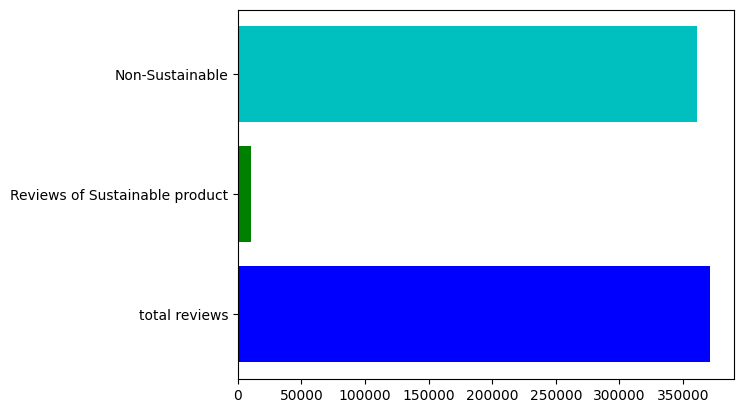

In [ ]:
import gzip
import json
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Specify the URL of the compressed JSON file
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/All_Beauty.json.gz'

# Download the compressed file
file_path, _ = urllib.request.urlretrieve(url)
keywords = ['natural', 'biodegradable', 'eco-friendly', 'sustainable']
count = 0
totalcount=0
# Open the compressed file and iterate through each line
with gzip.open(file_path, 'rt') as file:
    for line in file:
        review = json.loads(line)
        review_text = review.get('reviewText', '').lower()   # Get the review text, defaulting to an empty string
        totalcount += 1

        # Check if the review text contains the word "sustainable"
        if any(keyword in review_text for keyword in keywords):
              count += 1
x=[totalcount, count,totalcount-count]
y=['total reviews','Reviews of Sustainable product','Non-Sustainable']
plt.barh(y,x,color=['b','g','c'])

print(f"Total reviews containing keywords: {count}")
print(f"Total reviews: {totalcount}")


Total reviews containing keywords: 26264
Total reviews: 12980837


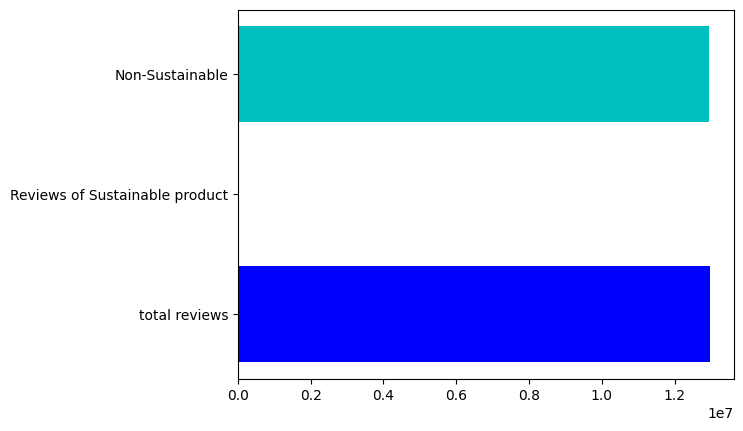

In [ ]:
import gzip
import json
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Specify the URL of the compressed JSON file
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Sports_and_Outdoors.json.gz'

# Download the compressed file
file_path, _ = urllib.request.urlretrieve(url)
keywords = ['natural', 'biodegradable', 'eco-friendly', 'sustainable']
count = 0
totalcount=0
# Open the compressed file and iterate through each line
with gzip.open(file_path, 'rt') as file:
    for line in file:
        review = json.loads(line)
        review_text = review.get('reviewText', '').lower()   # Get the review text, defaulting to an empty string
        totalcount += 1

        # Check if the review text contains the word "sustainable"
        if any(keyword in review_text for keyword in keywords):
              count += 1
x=[totalcount, count,totalcount-count]
y=['total reviews','Reviews of Sustainable product','Non-Sustainable']
plt.barh(y,x,color=['b','g','c'])

print(f"Total reviews containing keywords: {count}")
print(f"Total reviews: {totalcount}")


In [ ]:
import gzip
import json
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Specify the URL of the compressed JSON file
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Sports_and_Outdoors.json.gz'

# Download the compressed file
file_path, _ = urllib.request.urlretrieve(url)
keywords = ['natural', 'biodegradable', 'eco-friendly', 'sustainable']
count = 0
totalcount=0
# Open the compressed file and iterate through each line
with gzip.open(file_path, 'rt') as file:
    for line in file:
        review = json.loads(line)
        review_text = review.get('reviewText', '').lower()   # Get the review text, defaulting to an empty string
        totalcount += 1

        # Check if the review text contains the word "sustainable"
        if any(keyword in review_text for keyword in keywords):
              count += 1
x=[totalcount, count,totalcount-count]
y=['total reviews','Reviews of Sustainable product','Non-Sustainable']
plt.barh(y,x,color=['b','g','c'])

print(f"Total reviews containing keywords: {count}")
print(f"Total reviews: {totalcount}")


In [ ]:
import gzip
import json
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Specify the URL of the compressed JSON file
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Sports_and_Outdoors.json.gz'

# Download the compressed file
file_path, _ = urllib.request.urlretrieve(url)


In [ ]:

# Define the target words
target_words = ['natural', 'biodegradable', 'eco-friendly', 'sustainable']

# Initialize lists for storing review text and review usefulness
review_texts = []
review_usefulness = []

# Open the compressed file and iterate through each line
with gzip.open(file_path, 'rt') as file:
    for line in file:
        review = json.loads(line)
        review_text = review.get('reviewText', '').lower()   # Get the review text, defaulting to an empty string
        review_useful = review.get('helpful', [0, 0])[0]     # Get the review usefulness, defaulting to 0
        review_texts.append(review_text)
        review_usefulness.append(review_useful)



In [ ]:

# Create a DataFrame with the review text and review usefulness
data = pd.DataFrame({'ReviewText': review_texts, 'ReviewUsefulness': review_usefulness})
# Function to check if any target word is present in the review text
def check_target_words(review_text):
    return any(word in review_text for word in target_words)

# Create a binary feature indicating if any target word is present in the review text
data['HasTargetWord'] = data['ReviewText'].apply(check_target_words)


In [ ]:

# Prepare the data for linear regression
X = data[['HasTargetWord']]
y = data['ReviewUsefulness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model without text feature
model_no_text = LinearRegression()
model_no_text.fit(X_train, y_train)

# Predict review usefulness without text feature
y_pred_no_text = model_no_text.predict(X_test)


In [ ]:

# Calculate the mean squared error without text feature
mse_no_text = mean_squared_error(y_test, y_pred_no_text)
print("Mean Squared Error (without text feature):", mse_no_text)

# Create a count vectorizer to convert review text into numerical features
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['ReviewText'])

# Combine the binary feature with text features
X_combined = pd.concat([data['HasTargetWord'].reset_index(drop=True), pd.DataFrame(X_text.toarray())], axis=1)

# Split the combined data into training and testing sets
X_combined_train, X_combined_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Fit a linear regression model with text feature
model_with_text = LinearRegression()
model_with_text.fit(X_combined_train, y_train)

# Predict review usefulness with text feature
y_pred_with_text = model_with_text.predict(X_combined_test)

# Calculate the mean squared error with text feature
mse_with_text = mean_squared_error(y_test, y_pred_with_text)
print("Mean Squared Error (with text feature):", mse_with_text)


Mean Squared Error (without text feature): 0.0
